<a href="https://colab.research.google.com/github/royhandf/image-classification/blob/main/Klasifikasi_Gambar.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [19]:
import tensorflow as tf
print(tf.__version__)

2.9.2


In [20]:
!wget --no-check-certificate \
  https://dicoding-academy-assets.sgp1.cdn.digitaloceanspaces.com/184/messy-vs-clean-room.zip \
  -O /tmp/messy_vs_clean_room.zip

--2022-10-25 08:54:53--  https://dicoding-academy-assets.sgp1.cdn.digitaloceanspaces.com/184/messy-vs-clean-room.zip
Resolving dicoding-academy-assets.sgp1.cdn.digitaloceanspaces.com (dicoding-academy-assets.sgp1.cdn.digitaloceanspaces.com)... 205.185.216.10, 205.185.216.42
Connecting to dicoding-academy-assets.sgp1.cdn.digitaloceanspaces.com (dicoding-academy-assets.sgp1.cdn.digitaloceanspaces.com)|205.185.216.10|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 70392746 (67M) [application/zip]
Saving to: ‘/tmp/messy_vs_clean_room.zip’

/tmp/messy_vs_clean 100%[===================>]  67.13M   283MB/s    in 0.2s    

2022-10-25 08:54:54 (283 MB/s) - ‘/tmp/messy_vs_clean_room.zip’ saved [70392746/70392746]



In [21]:
# melakukan ekstraksi file zip
import zipfile, os
local_zip = '/tmp/messy_vs_clean_room.zip'
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall('/tmp')
zip_ref.close()

base_dir = '/tmp/images'
train_dir = os.path.join(base_dir, 'train')
validation_dir = os.path.join(base_dir, 'val')

In [22]:
os.listdir('/tmp/images/train')

['messy', 'clean']

In [23]:
os.listdir('/tmp/images/val')

['messy', 'clean']

In [24]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
train_datagen = ImageDataGenerator(
    rescale = 1./255,
    rotation_range = 20,
    horizontal_flip = True,
    shear_range = 0.2,
    fill_mode = 'nearest'
)

test_datagen = ImageDataGenerator(
    rescale = 1./255
)

In [32]:
train_generator = train_datagen.flow_from_directory(
    train_dir, # direktori data latih
    target_size = (150, 150), # mengubah resolusi seluruh gambar menjadi 150x150 piksel
    batch_size = 4,
    # karena ini merupakan masalah klasifikasi 2 kelas, gunakan class_mode = 'binary'
    class_mode = 'binary'
)

validation_generator = test_datagen.flow_from_directory(
    validation_dir, # direktori data validasi
    target_size = (150, 150), # mengubah resolusi seluruh gambar menjadi 150x150 piksel
    batch_size = 4,
    # karena ini merupakan masalah klasifikasi 2 kelas gunakan class_mode = 'binary'
    class_mode = 'binary'
)

Found 192 images belonging to 2 classes.
Found 20 images belonging to 2 classes.


In [27]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape = (150, 150, 3)),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Conv2D(128, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Conv2D(512, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid'),
])

In [28]:
# melihat summary arsitektur model 
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_8 (Conv2D)           (None, 148, 148, 32)      896       
                                                                 
 max_pooling2d_8 (MaxPooling  (None, 74, 74, 32)       0         
 2D)                                                             
                                                                 
 conv2d_9 (Conv2D)           (None, 72, 72, 64)        18496     
                                                                 
 max_pooling2d_9 (MaxPooling  (None, 36, 36, 64)       0         
 2D)                                                             
                                                                 
 conv2d_10 (Conv2D)          (None, 34, 34, 128)       73856     
                                                                 
 max_pooling2d_10 (MaxPoolin  (None, 17, 17, 128)     

In [29]:
# compile model dengan 'adam' optimizer loss function 'binary_crossentropy' 
model.compile(
    loss = 'binary_crossentropy',
    optimizer = tf.optimizers.Adam(),
    metrics = ['accuracy']
)

In [33]:
history = model.fit(
        train_generator,
        steps_per_epoch = 25,  # berapa batch yang akan dieksekusi pada setiap epoch
        epochs = 25,
        validation_data = validation_generator, # menampilkan akurasi pengujian data validasi
        validation_steps = 5,  # berapa batch yang akan dieksekusi pada setiap epoch
        verbose = 2
      )

Epoch 1/25
25/25 - 20s - loss: 0.7743 - accuracy: 0.5000 - val_loss: 0.6821 - val_accuracy: 0.5000 - 20s/epoch - 785ms/step
Epoch 2/25
25/25 - 13s - loss: 0.7005 - accuracy: 0.4500 - val_loss: 0.6868 - val_accuracy: 0.6000 - 13s/epoch - 502ms/step
Epoch 3/25
25/25 - 13s - loss: 0.6849 - accuracy: 0.6300 - val_loss: 0.6993 - val_accuracy: 0.5000 - 13s/epoch - 515ms/step
Epoch 4/25
25/25 - 13s - loss: 0.7486 - accuracy: 0.3900 - val_loss: 0.6931 - val_accuracy: 0.5000 - 13s/epoch - 522ms/step
Epoch 5/25
25/25 - 15s - loss: 0.6933 - accuracy: 0.5100 - val_loss: 0.6933 - val_accuracy: 0.5000 - 15s/epoch - 618ms/step
Epoch 6/25
25/25 - 16s - loss: 0.6928 - accuracy: 0.5300 - val_loss: 0.6899 - val_accuracy: 0.5000 - 16s/epoch - 627ms/step
Epoch 7/25
25/25 - 14s - loss: 0.6618 - accuracy: 0.6600 - val_loss: 0.5819 - val_accuracy: 0.7000 - 14s/epoch - 569ms/step
Epoch 8/25
25/25 - 15s - loss: 0.7121 - accuracy: 0.5500 - val_loss: 0.6927 - val_accuracy: 0.5000 - 15s/epoch - 591ms/step
Epoch 9/

Saving unnamed.jpg to unnamed.jpg
1/1 [==============================] - 0s 43ms/step
unnamed.jpg
messy


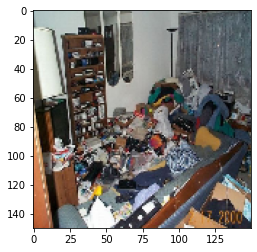

In [37]:
import numpy as np
from google.colab import files
from tensorflow.keras.preprocessing import image
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
%matplotlib inline

uploaded = files.upload()

for fn in uploaded.keys():
  # predictiong image
  path = fn
  img = image.load_img(path, target_size = (150, 150))

  imgplot = plt.imshow(img)
  x = image.img_to_array(img)
  x = np.expand_dims(x, axis = 0)
  images = np.vstack([x])

  classes = model.predict(images, batch_size = 10)
  print(fn)
  if classes == 0:
    print('clean')
  else:
    print('messy')